<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

WHOS = [
    'aaaaa',
    'carolyn',
    'chris',
    'celiven',
    'cuxi',
    'eve',
    'fatfat',
    'john',
    'kdchang',
    'oliver',
    'sheep',
]

In [3]:
pfs = []
for who in tqdm(WHOS):
    print(who)
    pf = get_profile(who)
    pfs.append(pf)

100%|██████████| 11/11 [00:00<00:00, 151.48it/s]

aaaaa
carolyn
chris
celiven
cuxi
eve
fatfat
john
kdchang
oliver
sheep


In [4]:
pf = pd.concat(pfs, ignore_index=True)
pf

,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_SMA,L_G_SMA,...,R_GX_ZCR,R_GY_ZCR,R_GZ_ZCR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type
0,-1.1969,-1.1365,-1.0215,-0.5590,-0.8667,-0.8638,-1.1039,-0.6350,-1.2008,-1.1428,...,-0.3085,-0.5551,-0.5923,-0.4519,0.8114,-0.6651,0.9898,0.6397,0.6965,1
1,-1.2076,-1.1389,-1.0431,-0.5450,-0.8773,-0.8254,-1.1159,-0.6521,-1.2141,-1.1477,...,-0.3085,-0.5551,-0.5923,-0.8593,-0.0828,0.1744,0.3508,-0.0076,0.9294,1
2,-1.1874,-1.1246,-1.0698,-0.5584,-0.8652,-0.7445,-1.1028,-0.6428,-1.1890,-1.1316,...,1.4747,0.6159,-0.5923,-0.0078,0.5123,-0.3534,0.9531,-0.5925,-0.4703,1
3,-1.2105,-1.1043,-1.0847,-0.5499,-0.9141,-0.7160,-1.1256,-0.6347,-1.2114,-1.1070,...,2.2303,-0.5551,-0.5923,0.7413,0.5805,0.1305,0.7696,-0.8201,-0.3354,1
4,-1.2022,-1.1230,-1.0735,-0.5570,-0.9239,-0.9078,-1.1157,-0.6115,-1.2035,-1.1306,...,0.9609,-0.5551,-0.5923,0.4263,0.5761,0.2507,0.8688,-0.1864,0.2627,1
5,-1.2056,-1.1199,-1.0180,-0.5676,-0.9299,-1.0407,-1.1348,-0.6079,-1.2074,-1.1305,...,0.3262,-0.5551,-0.0724,0.6993,0.9122,0.4069,0.8326,-0.3687,0.1346,1
6,-1.1936,-1.1134,-1.0866,-0.5814,-0.8970,-1.0036,-1.1025,-0.6188,-1.1920,-1.1279,...,1.5956,-0.5551,-0.5923,0.2358,0.4063,0.5399,0.7670,-0.8397,-0.3349,1
7,-1.1966,-1.1198,-1.0616,-0.5984,-0.9004,-0.9401,-1.1141,-0.6221,-1.1971,-1.1305,...,1.5956,-0.5551,-0.5923,0.7175,0.6260,0.3401,0.7033,-0.4210,0.2138,1
8,-1.1974,-1.1127,-1.0444,-0.6108,-0.9145,-0.9234,-1.1073,-0.6223,-1.2004,-1.1209,...,0.9609,-0.5551,-0.5923,0.6031,0.7116,0.3644,0.8257,-0.4892,0.0053,1
9,-1.1808,-1.1019,-1.0456,-0.6374,-0.9045,-0.9319,-1.0846,-0.6322,-1.1829,-1.1149,...,0.3262,-0.5551,-0.5923,0.5879,0.7571,0.3276,0.8644,-0.5730,-0.1811,1


# LGBM training

In [14]:
train_df = pf

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

x_train, x_valid_1, y_train, y_valid_1 = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)

y_train

2579    0
2229    4
622     2
2659    1
2764    2
2703    1
2736    2
2274    0
1753    2
817     1
2371    1
2082    2
484     0
355     2
1584    1
2063    1
1659    1
977     4
488     5
1052    5
2333    1
1866    4
1598    1
1186    2
602     1
1445    2
2124    2
1628    1
661     2
1369    5
       ..
2266    0
928     3
2879    0
2794    2
30      2
2559    4
913     2
2699    1
2350    1
2801    3
701     3
1150    2
2686    1
1065    5
462     0
86      0
2480    3
2460    2
2910    0
29      2
781     1
2519    3
2409    2
683     3
1181    2
800     1
2774    2
589     1
170     2
1326    0
Name: hit_type, Length: 2371, dtype: int64

In [6]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [7]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid_1, y_valid_1, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 6,
#     'min_data_in_leaf': 3,
    'max_depth': 5,
    'num_leaves': 2 ** 5,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=200, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred_1 = model.predict(x_valid_1, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.883538
[10]	valid_0's f1-score: 0.914506
[15]	valid_0's f1-score: 0.918769
[20]	valid_0's f1-score: 0.93511
[25]	valid_0's f1-score: 0.93454
[30]	valid_0's f1-score: 0.944009
[35]	valid_0's f1-score: 0.946088
[40]	valid_0's f1-score: 0.950912
[45]	valid_0's f1-score: 0.958034
[50]	valid_0's f1-score: 0.95941
[55]	valid_0's f1-score: 0.962637
[60]	valid_0's f1-score: 0.966524
[65]	valid_0's f1-score: 0.966524
[70]	valid_0's f1-score: 0.968148
[75]	valid_0's f1-score: 0.972146
[80]	valid_0's f1-score: 0.973219
[85]	valid_0's f1-score: 0.973219
[90]	valid_0's f1-score: 0.974792
[95]	valid_0's f1-score: 0.975865
[100]	valid_0's f1-score: 0.97689
[105]	valid_0's f1-score: 0.977963
[110]	valid_0's f1-score: 0.977963
[115]	valid_0's f1-score: 0.977963
[120]	valid_0's f1-score: 0.977963
[125]	valid_0's f1-score: 0.977963
[130]	valid_0's f1-score: 0.977963
[135]	valid_0's f1-score: 0.977963
[140]	valid_0's 

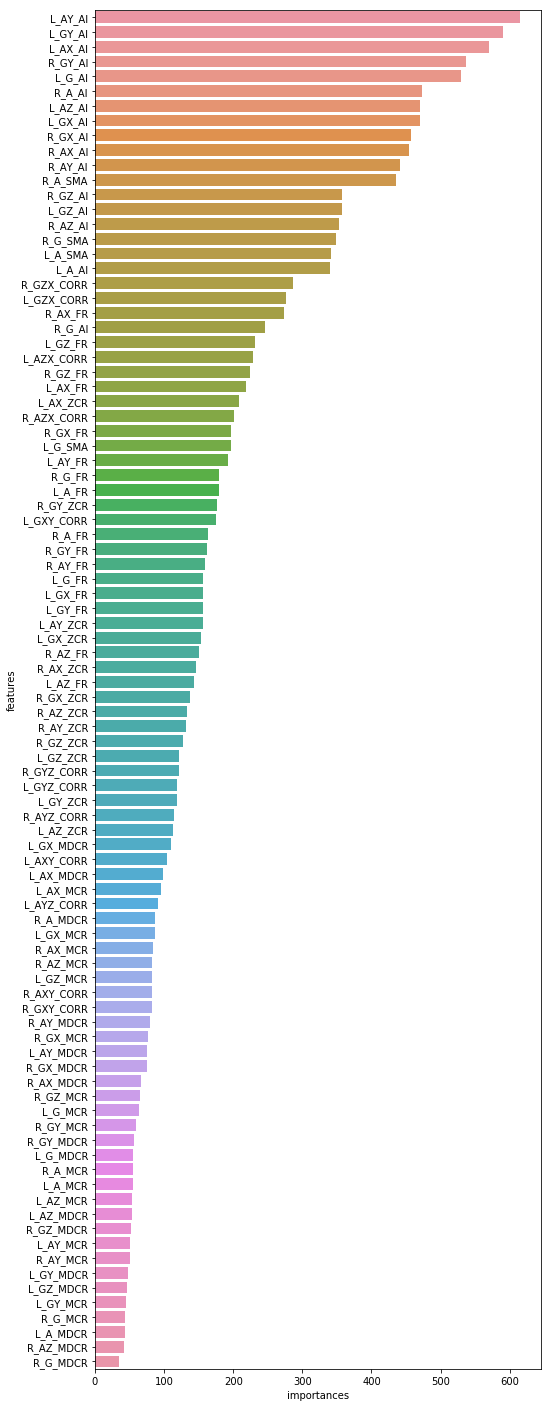

In [8]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [9]:
y_test = []
for y_pred in [y_pred_1]:
    predictions = []
    for x in y_pred:
        predictions.append(np.argmax(x))
    y_test.append(pd.Series(data=predictions))

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
from taiko.primitive import Primitive
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

Normalized confusion matrix
[[0.94117647 0.03921569 0.         0.         0.01960784 0.        ]
 [0.         0.96153846 0.03205128 0.00641026 0.         0.        ]
 [0.         0.00641026 0.99358974 0.         0.         0.        ]
 [0.01265823 0.         0.         0.98734177 0.         0.        ]
 [0.         0.         0.         0.01265823 0.98734177 0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


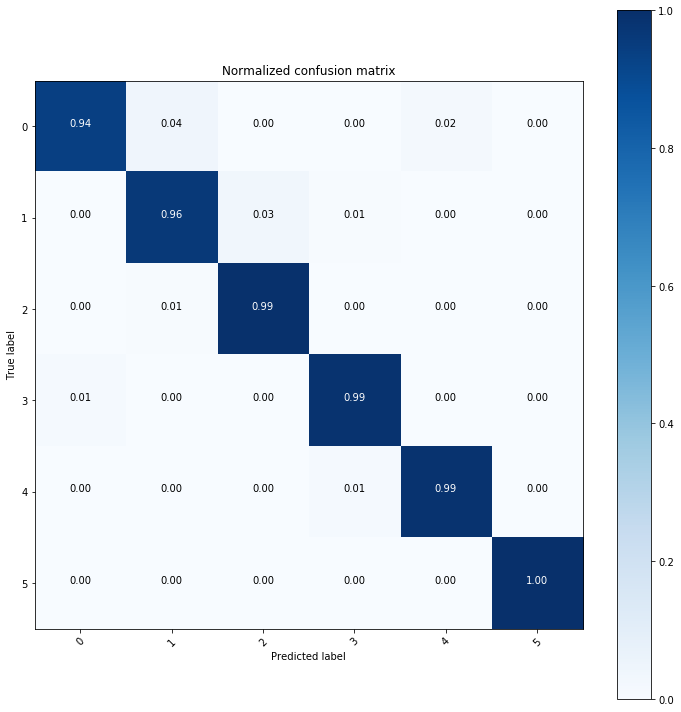

             precision    recall  f1-score   support

          0       0.98      0.94      0.96        51
          1       0.98      0.96      0.97       156
          2       0.97      0.99      0.98       156
          3       0.97      0.99      0.98        79
          4       0.99      0.99      0.99        79
          5       1.00      1.00      1.00        72

avg / total       0.98      0.98      0.98       593

0.9800600487098686


In [12]:
y_valid = [y_valid_1]
for y_val, y_tst in zip(y_valid, y_test):
    cutstom_output_cnf_matrix(y_val, y_tst)
    print(metrics.classification_report(y_val, y_tst))
    
    print(metrics.f1_score(y_tst, y_val, average = 'macro'))

In [13]:
model.save_model('lgbm_model.h5')